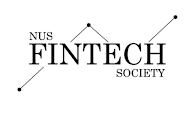

Disclaimer: 
<p> The material in this workshop is purely educational and should not be taken as professional investment advice. Invest at your own discretion.
</p>



In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 11.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=d49300d52669aa8f2b431c9f471d6e9d89f81be894716ce7c1f2b1c5a3020143
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.request import Request
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "



# What we will be doing today
<body>
  <li> Use the DJIA dataset and train a model to predict whether the stock prices will increase, decrease or remain unchanged based on the news headlines.</li>
  <li> (EXTRA) Use basic webscrapping to scrape news headlines and perform sentiment analysis on those headlines.</li>
</body>

# Objectives of today
<ol>
<li>
  Learn about the basics of sentiment analysis
</li>
<li>
  Understand how to use existing packages and libraries to do sentiment analysis
</li>
<li>
  Find out how market sentiment affects the stock market
</li>
<li>
  Have fun with machine learning!! :D
</li>
</ol>


# What is DJIA?
<body> The Dow Jones Industrial Average, is a stock market index that measures the stock performance of 30 large companies listed on stock exchanges in the United States. (Wikipedia)
<br>
Some of the companies traded on DJIA include:
<li> AAPL (Apple) </li>
<li> MSFT (Microsoft) </li>
<li> JPM (JP Morgan and Chase) </li>
</br>
</body>

# Load the dataset using files.upload
<li> DJIAnews.csv </li>
<li> DJIAprices.csv </li>

In [ ]:
# Load the csv files
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

### Why is sentiment analysis relevant in finance?
<ol>
  <li> Emotions often drive the stock market. Therefore, valuations may drive stock prices in the long run, but in the short term it is market sentiment that moves prices.
  </li> 
  <li> Day traders and technical analysts rely on market sentiment, as it influences the technical indicators they utilize to measure and profit from short-term price movements often caused by investor attitudes toward a security.
  </li>
  <li> Market Sentiment are often described as bullish or bearish. A market is bullish when the prices are going up, and bearish when the prices are going down.
  </li>
</ol>

### What do we look at?
<p> A stock's closing price is the standard benchmark used by investors to track its performance over time. </p>
<p> The closing price is the last price at which the stock is traded during the regular trading day. 
</p>

[Read more on Market Sentiment](https://www.investopedia.com/terms/m/marketsentiment.asp#:~:text=Market%20sentiment%20is%20also%20important,stock%20prices%20are%20going%20down.)

[Read more on Closing Price](https://www.investopedia.com/terms/c/closingprice.asp)

In [ ]:
df_prices = pd.read_csv("DJIAprices.csv")
df_news = pd.read_csv("DJIAnews.csv")
df_prices.head()
# df_news.head()

# Label:
# 0 : Adjusted Close value decreased
# 1 : Adjusted Close value rose or stayed the same

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
print(df_prices.shape)
print(df_news.shape)

(1989, 7)
(1989, 27)


In [ ]:
# Merge the df_prices together with df_news using df.merge()
merged_df = df_news.merge(df_prices, how = "inner", on = "Date", left_index = True)
merged_df[:3]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""

In [ ]:
# Combine the headlines in a list
headlines = []

# From column 2 to 27 (25 news headlines)
for row in range(0, len(merged_df.index)):
  headlines.append(' '.join(str(x) for x in merged_df.iloc[row,  2:27]))

# Print out a sample
print(headlines[0])

b"Georgia 'downs two Russian warplanes' as countries move to brink of war" b'BREAKING: Musharraf to be impeached.' b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)' b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire' b"Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing" b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side" b"The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]' b'Did the U.S. Prep Georgia for War with Russia?' b'Rice Gives Green 

In [ ]:
# Clean the data to remove 
cleaned = []

# Find the specific characters, specifically "b" and "/b" and replace with empty string
for i in range(0, len(headlines)):
  cleaned.append(re.sub("b[(')]", "", headlines[i])) # remove b'
  cleaned[i]= re.sub('b[("")]', '', cleaned[i]) # remove b", start with single quote to be able to use double quote
  cleaned[i] = re.sub("\'", '', cleaned[i]) # remove \' 

print(cleaned[0])

Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: Sa

In [ ]:
# Add cleaned headlines into merged data set
merged_df['Combined_News'] = cleaned

# Show the new column
merged_df['Combined_News'][0]

'A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898. IMF chief backs Athens as permanent Olympic host The president of France says if Brexit won, so can Donald Trump British Man Who Must Give Police 24 Hours Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime. 100+ Nobel laureates urge Greenpeace to stop opposing GMOs Brazil: Huge spike in number of police killings in Rio ahead of Olympics Austrias highest court annuls presidential election narrowly lost by right-wing candidate. Facebook wins privacy case, can track any Belgian it wants: Doesnt matter if Internet users are logged into Facebook or not Switzerland denies Muslim girls citizenship after they refuse to swim with boys at school: The 12- and 14-year-old will no longer be considered for naturalised citizenship because

In [ ]:
# View the first 3 rows of merged data set
merged_df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point 

### What is Text Blob?
<body>
TextBlob is a library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
<p>
<ol>
  <li> TextBlob('text').sentiment.subjectivity</li>
  <p> Range [0,1] where 1 is <b>purely subjective</b> and 0 is <b>purely factual</b></p>
  <li> TextBlobl('text').sentiment.polarity </li>
  <p> Range [-1,1] where -1 is <b>negative statement</b> and 1 is a <b>positive statement</b></p>
</ol>
</p>
<p>
Other cool things you can do with TextBlob like Spelling Correction  

```
blob = TextBlob("I lve fintch!")
blob.correct()
>> TextBlob("I love fintech!")
```
[Read more on TextBlob here](https://medium.com/@patilpratik699/introduction-to-textblob-a-tool-for-natural-language-processing-7f0a225ed0ee)


</p>
</body>


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
# Create two new columns 'Subjectivity' 'Polarity'
merged_df['Subjectivity'] = merged_df['Combined_News'].apply(getSubjectivity)
merged_df['Polarity'] = merged_df['Combined_News'].apply(getPolarity)

# Show the new columns in merge data set
merged_df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News,Subjectivity,Polarity
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b

# What is VADER?
<p>
VADER - <u>V</u>alence <u>A</u>ware <u>D</u>ictionary for s<u>E</u>ntiment <u>R</u>easoning
</p>
<p>
VADER is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
</p>

[Read more on VADER](https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664#:~:text=VADER%20(%20Valence%20Aware%20Dictionary%20for,intensity%20(strength)%20of%20emotion.&text=VADER%20sentimental%20analysis%20relies%20on,intensities%20known%20as%20sentiment%20scores.)

In [ ]:
# Create a function to get the sentiment score
def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [ ]:
# Get the sentiment scores for each day
compound = []
neg = []
pos = []
neu = []
SIA = 0

#Run each headline in the SentimentIntensityAnalyzer
for i in range(0, len(merged_df['Combined_News'])):
  SIA = getSIA(merged_df['Combined_News'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  pos.append(SIA['pos'])
  neu.append(SIA['neu'])

# store the scores into the merged_df
merged_df['Compound'] = compound
merged_df['Negative'] = neg
merged_df['Neutral'] = neu
merged_df['Positive'] = pos
merged_df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.212,0.728,0.061
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9977,0.205,0.733,0.062
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia

In [ ]:
# List of columns to keep
cols = ['Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound',
        'Negative', 'Neutral', 'Positive', 'Label']

df = merged_df[cols]

In [ ]:
# Create the feature dataset
X = df
X = np.array(X.drop(['Label'], 1))

# Create the target dataset
y = np.array(df['Label'])

In [ ]:
# Split the dataset into 80:20 (Train : Test dataset)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

### Linear Discriminant Analysis - sklearn library
<body>
  <p>
    A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule to predict the output. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
  </p>
</body>

  Consider K classes {1,2,3...K}, and an input vector X. We classify X as belonging to the class *i* that maximizes $P(Y = i|X)$.
  <p>
  Using Bayes' rule, $P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}$
  </p>
  <p> This formula says that we can relate the probability of X belonging to each class to the probability of input taking on the value of X in each class. For simplicity, we shall assume we only have 1 input variable in which case X is just a number. 
  </p>
  <p>
    Plugging the normal distribution into Bayes' Rule and we get
  </p>
  $P(Y = i|X = \alpha) = \frac{\frac{1}{\sqrt{2\pi}}e^{\frac{-1}{2}(\frac{X - \mu_i}{\sigma_i})^2}P(Y=i)}{P(X = \alpha)}$
  <p>
    We want to find the class that maximizes the value above.
  </p>
[Read More on LDA](https://medium.com/analytics-vidhya/linear-discriminant-analysis-explained-in-under-4-minutes-e558e962c877)


In [ ]:
# Create and train the model
model = LinearDiscriminantAnalysis().fit(x_train, y_train)
# Show the model prediction on x_test
pred = model.predict(x_test)
print(pred)

[0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0
 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1]


In [ ]:
# Match the prediction with y_test 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       191
           1       0.81      0.90      0.85       207

    accuracy                           0.84       398
   macro avg       0.84      0.84      0.84       398
weighted avg       0.84      0.84      0.84       398



# (EXTRA) Using FinViz to get the stocks' sentiment using VADER

### What is FinViz?
<p> FINVIZ is a browser-based stock market research platform that makes market information easily accessible to traders and investors.</p>
<p> The platform provides latest financial news, market maps, comparative tools and charts, portfolio tracking, advanced screeners, and sector performance tools. </p>

[Visit FinViz](https://finviz.com/)

In [ ]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn
from urllib.request import urlopen
from urllib.request import Request
import yfinance as yf

In [ ]:
# Define the parameters
tickers = ['TSLA', "GOOGL", "AAPL"]

# Other tickers:
# Microsoft : MSFT, Google : GOOGL, SnapChat : SNAP, ByteDance : KKR, Apple: AAPL, Tesla : TSLA, Amazon: AMZN
# Gold : GOLD
# Pfizer : PFE, BioNTech : , Moderna : MRNA

In [ ]:
# Data Collection
# https://finviz.com/quote.ashx?t=AAPL
finviz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}

# For each stock, we would gather the news headlines from the website using BeautifulSoup
for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table
  
  # Iterate through the news
parsed_news = []
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news[:3]

In [ ]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

In [ ]:
# View Data 
unique_ticker = parsed_and_scored_news['ticker'].unique().tolist()
news_dict = {name: parsed_and_scored_news.loc[parsed_and_scored_news['ticker'] == name] for name in unique_ticker}

values = []
for ticker in tickers: 
    dataframe = news_dict[ticker]
    dataframe = dataframe.set_index('ticker')
    dataframe = dataframe.drop(columns = ['headline'])
    print ('\n')
    print (dataframe.head())
    
    mean = round(dataframe['compound'].mean(), 2)
    values.append(mean)

df = pd.DataFrame(list(zip(tickers, values)), columns = ['ticker', 'Mean Sentiment']) 
df = df.set_index('ticker')
df = df.sort_values('Mean Sentiment', ascending=False)
print ('\n')
print (df)

# The compound score is computed by summing the valence scores of each word
# in the lexicon, adjusted according to the rules, and then normalized to be 
# between -1 (most extreme negative) and +1 (most extreme positive).
# positive sentiment : (compound score >= 0.05)
# neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
3# negative sentiment : (compound score <= -0.05)

In [ ]:
# Change accordingly!
TSLA = yf.Ticker("TSLA")
GOOGL = yf.Ticker("GOOGL")
AAPL = yf.Ticker("AAPL")

hist_TSLA = TSLA.history(start = '2020-01-05', end = '2021-01-06')
hist_GOOGL = GOOGL.history(start = '2020-01-05', end = '2021-01-06')
hist_AAPL = AAPL.history(start = '2020-01-05', end = '2021-01-06')

TSLA_close = hist_TSLA[["Close"]]
GOOGL_close = hist_GOOGL[["Close"]]
AAPL_close = hist_AAPL[["Close"]]

prices = pd.merge(pd.merge(TSLA_close, GOOGL_close,on='Date'),AAPL_close,on='Date')
prices = prices.rename(columns={"Close_x": "TSLA", "Close_y": "GOOGL", "Close" : "AAPL"})
prices.shape

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
mean_scores.index = pd.to_datetime(mean_scores.index).date

# Plot a bar chart with pandas
prices.plot(kind = 'line')
mean_scores.plot(kind = 'bar')
plt.grid()

# Thank you so much for your time!
### Check out @nusfintech on Instagram to find out more about machine learning and FinTech!
<p>
Credits for the inspiration and dataset provided:
    <br> Aaron7sun, Kaggle Competition "Daily News for Stock Market Prediction" </br>
    Bohmian, towards data science article : "Sentiment Analysis of Stocks from Financial News using Python"
</p>